In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.9 MB/s 
     |████████████████████████████████| 9.8 MB 45.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
from dateutil.relativedelta import relativedelta
import pmdarima as pm
from pmdarima.arima import auto_arima
import numpy as np
import pandas as pd
import time

In [6]:
import pandas as pd


In [16]:
y = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]
y

[3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

In [17]:
# check stationarity before running ARIMA

from statsmodels.tsa.stattools import adfuller

adfuller(y)

(-0.9753836234744063,
 0.7621363564361013,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 31.2466098872313)

In [21]:
y_diff = pd.Series(y).diff()
y_diff = y_diff[1:]

In [22]:
adfuller(y_diff)

(-8.114786336606889,
 1.1990596089049098e-12,
 4,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 9.548896429446039)

In [25]:
y = pd.Series(y)
y

0      3
1      4
2      4
3      5
4      6
5      7
6      6
7      6
8      7
9      8
10     9
11    12
12    10
dtype: int64

In [31]:
df = pd.read_csv("https://datasets.techoverflow.net/timeseries-example.csv", parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [34]:
df.head()

,Sine,Cosine
Timestamp,,
2020-05-25 20:05:09.990774,0.0000,1.0000
2020-05-25 20:05:09.990874,0.0063,1.0000
2020-05-25 20:05:09.990974,0.0126,0.9999
2020-05-25 20:05:09.991074,0.0188,0.9998
2020-05-25 20:05:09.991174,0.0251,0.9997


In [38]:
# Set train and test sets
df_train = df.iloc[0:200]
df_test = df.iloc[200:250]

In [ ]:
mod = auto_arima(df_train['Sine'], X=None, 
           start_p=0, d=None, start_q=0, 
           max_p=2, max_d=1, max_q=2, 
           start_P=0, D=None, start_Q=0, 
           max_P=2, max_D=1, max_Q=2, max_order=2, 
           m=10, seasonal=True, 
           stationary=False, trace=True,
           information_criterion='oob', alpha=0.05, test='kpss', seasonal_test='ocsb', 
           stepwise=True, n_jobs=1, 
           maxiter=50, out_of_sample_size=3, scoring='mae', verbose=2)

In [41]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  200
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 10)   Log Likelihood                1460.312
Date:                             Thu, 06 Oct 2022   AIC                          -2914.625
Time:                                     00:23:07   BIC                          -2904.899
Sample:                                          0   HQIC                         -2910.685
                                             - 200                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002   7.62e-06    -28.688      0.000      -0.000      -0.000
ma.L1       3.679e-21    1.5e-11   2.45e-10      1.000   -2.94e-11    2.94e-11
sigma2      1.053e-08   1.69e-09      6.247      0.000    7.23e-09    1.38e-08
===================================================================================
Ljung-Box (L1) (Q):                 186.27   Jarque-Bera (JB):                13.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.29
Prob(H) (two-sided):                  0.26   Kurtosis:                         1.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.82e+24. Standard errors may be unstable.
"""

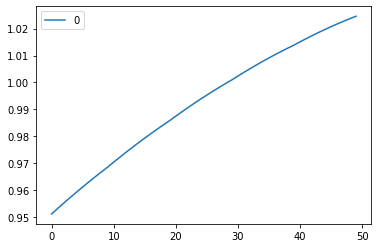

In [58]:
pd.DataFrame(mod.predict(50)).plot()

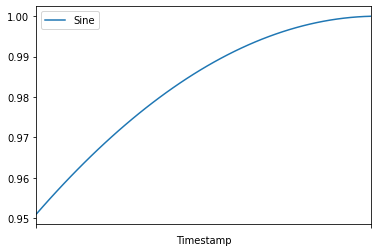

In [54]:
pd.DataFrame(df_test['Sine']).plot()

In [55]:
# final step

# predict on a hold out set of test data
from sklearn.metrics import mean_absolute_error

yhats = mod.predict(50)
mean_absolute_error(yhats, df_test['Sine'])

# This number tells you the unbiased estimation of our prediction error in production

0.009128286897115458